In [146]:
! pip install import_ipynb
! pip install sklearn_evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 1.9 MB/s eta 0:00:002.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.1 MB/s eta 0:00:006.2 MB/s eta 0:00:01
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)


  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [174]:
import import_ipynb
import Feature
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn_evaluation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

In [180]:
# define train, test, validation set
X_train = Feature.train_news['statement']
y_train = Feature.train_news['label']

X_test = Feature.test_news['statement']
y_test = Feature.test_news['label']

X_val = Feature.valid_news['statement']
y_val = Feature.valid_news['label']

# define whole dataset
X = pd.concat([X_train, X_test, X_val])
y = pd.concat([y_train, y_test, y_val])

In [181]:
# define classification function using model
def classification(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # using 5 fold cross validation
    train_size,train_score,test_score = learning_curve(clf, X_train, y_train, cv=5)
    sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)
    
    acc = np.mean(y_test == y_pred)
    clf_table = classification_report(y_test, y_pred, target_names=['false', 'true'])
    
    return acc, clf_table

In [182]:
#Using bag of word (CounterVectorize)

In [189]:
# vanila logistic regression
model_lgr_vanila = Pipeline([
        ('feature_extractor',Feature.countV),
        ('clf',LogisticRegression())
        ])

# set l2 penalty and C = 0.01 (need to regularize)
model_lgr = Pipeline([
        ('feature_extractor',Feature.countV),
        ('lgr_clf',LogisticRegression(penalty='l2', C=0.01))
        ])

# vanila Linear SVM
model_svm_vanila = Pipeline([
        ('feature_extractor',Feature.countV),
        ('svm_clf',svm.LinearSVC())
        ])

# vanila Linear SVM
model_svm = Pipeline([
        ('feature_extractor',Feature.countV),
        ('svm_clf',svm.LinearSVC(loss = 'hinge', C = 0.1))
        ])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

accuracy :  0.7118697150015659
              precision    recall  f1-score   support

       false       0.46      0.29      0.36       879
        true       0.76      0.87      0.81      2314

    accuracy                           0.71      3193
   macro avg       0.61      0.58      0.59      3193
weighted avg       0.68      0.71      0.69      3193



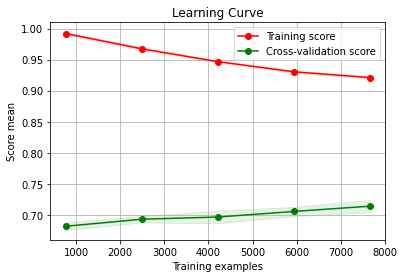

In [190]:
# vanila logistic regression
acc, table = classification(model_lgr_vanila, X, y)
print("accuracy : ",acc)
print(table)

accuracy :  0.7316003758221109
              precision    recall  f1-score   support

       false       1.00      0.01      0.01       862
        true       0.73      1.00      0.84      2331

    accuracy                           0.73      3193
   macro avg       0.87      0.50      0.43      3193
weighted avg       0.80      0.73      0.62      3193



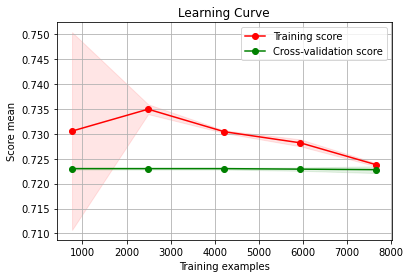

In [192]:
# logistic reguression with l2 regularization and less C
acc, table = classification(model_lgr, X, y)
print("accuracy : ",acc)
print(table)

accuracy :  0.6930786094581898
              precision    recall  f1-score   support

       false       0.44      0.43      0.43       868
        true       0.79      0.79      0.79      2325

    accuracy                           0.69      3193
   macro avg       0.61      0.61      0.61      3193
weighted avg       0.69      0.69      0.69      3193



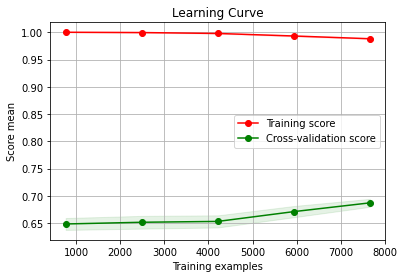

In [193]:
# vanila linear svm
acc, table = classification(model_svm_vanila, X, y)
print("accuracy : ",acc)
print(table)

accuracy :  0.7225180081428124
              precision    recall  f1-score   support

       false       0.56      0.11      0.18       907
        true       0.73      0.97      0.83      2286

    accuracy                           0.72      3193
   macro avg       0.65      0.54      0.51      3193
weighted avg       0.68      0.72      0.65      3193



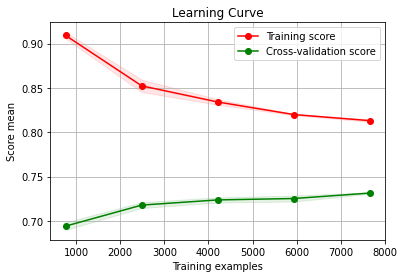

In [194]:
# linear svm with hinge loss
acc, table = classification(model_svm, X, y)
print("accuracy : ",acc)
print(table)